This lab experiment aims to apply the Fourier Transform on various signals in the
time domain and analyze its frequency spectrum using the Discrete-Time Fourier
Transform (DTFT) and the Discrete Fourier Transform (DFT).

(1) Question 1

(a) Generate a basic sinusoidal signal in the time domain.

(For example, you may generate a sine wave with a frequency of 5Hz,
sampled at 1000Hz.)

(b) Plot the time-domain waveform of the signal.

(c) Compute the Discrete-Time Fourier Transform (DTFT) and plot the con-
tinuous frequency spectrum.

(d) Compute the Discrete Fourier Transform (DFT) and plot the discrete
frequency spectrum.

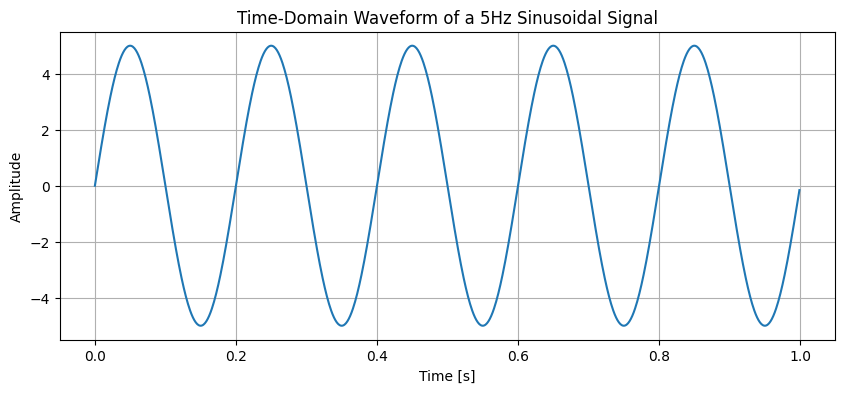

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

# Parameters
Fs = 1000  # Sampling frequency (samples per second)
f = 5  # Frequency of the sine wave (5 Hz)
t = np.arange(0, 1, 1/Fs)  # Time vector from 0 to 1 second, sampled at 1000 Hz

# (a) Generate a basic sinusoidal signal
amp = 5  # Amplitude
signal = amp * np.sin(2 * np.pi * f * t)

# (b) Plot the time-domain waveform
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title('Time-Domain Waveform of a 5Hz Sinusoidal Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


<ipython-input-5-a0bf8ac7a0b6>:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n, sampled_signal, 'ro', label='Sampled Signal (fs = 100Hz)', use_line_collection=True)


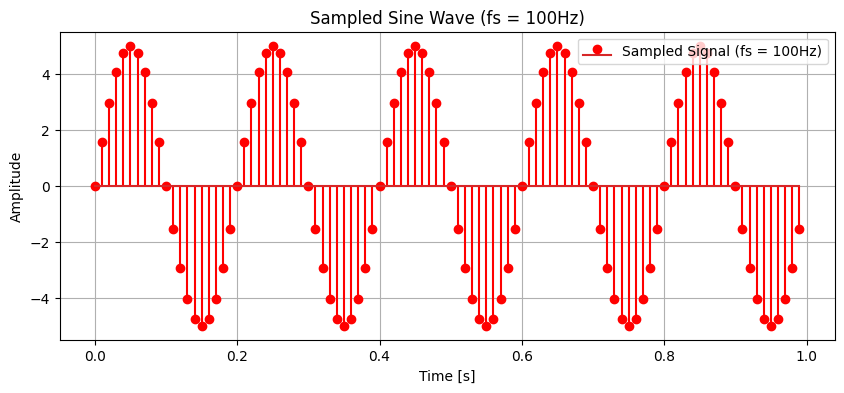

In [ ]:
# Sampling the signal (the signal is already sampled at 1000Hz)
# However, we will simulate a lower sampling frequency for analysis.
s_rate = 100  # Resample at 100 Hz
T = 1 / s_rate
n = np.arange(0, 1, T)  # New time points at 100Hz
sampled_signal = amp * np.sin(2 * np.pi * f * n)

# Plot sampled signal
plt.figure(figsize=(10, 4))
plt.stem(n, sampled_signal, 'ro', label='Sampled Signal (fs = 100Hz)', use_line_collection=True)
plt.title('Sampled Sine Wave (fs = 100Hz)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

<ipython-input-6-5b23062b108d>:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n, quantized_signal, 'bo', label='Quantized Signal (3 bits)', use_line_collection=True)


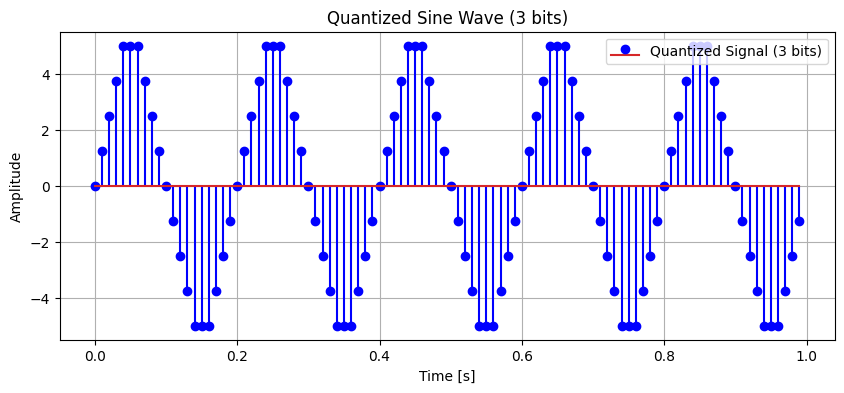

In [ ]:
# Quantization
num_bits = 3  # For quantization, let's use 3 bits
quant_levels = 2 ** num_bits
max_val = np.max(np.abs(sampled_signal))  # Find max value to normalize
quant_step = 2 * max_val / quant_levels
quantized_signal = np.round(sampled_signal / quant_step) * quant_step

# Plot quantized signal
plt.figure(figsize=(10, 4))
plt.stem(n, quantized_signal, 'bo', label='Quantized Signal (3 bits)', use_line_collection=True)
plt.title('Quantized Sine Wave (3 bits)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()


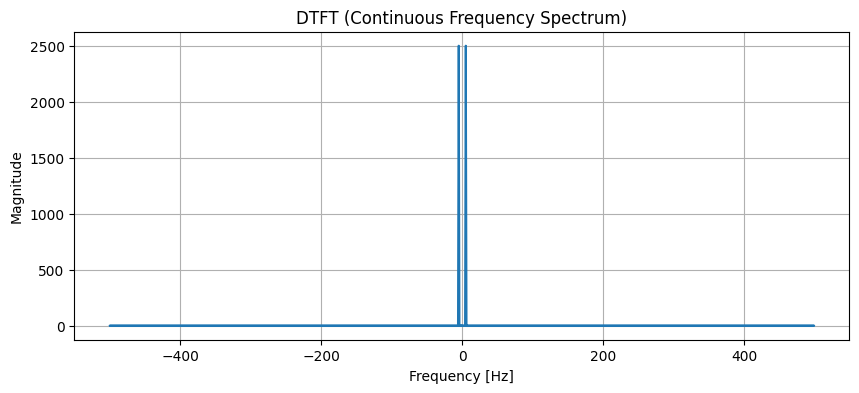

In [ ]:
# (c) Compute the Discrete-Time Fourier Transform (DTFT)
N = len(signal)  # Length of the original signal
freq = fftfreq(N, 1/Fs)  # Frequency vector
signal_dtft = fft(signal)  # Compute DTFT (using FFT for continuous spectrum)

# Plot the DTFT
plt.figure(figsize=(10, 4))
plt.plot(freq, np.abs(signal_dtft))
plt.title('DTFT (Continuous Frequency Spectrum)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

<ipython-input-8-4c0c7def4374>:8: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(freq_dft[:N_dft//2], np.abs(signal_dft[:N_dft//2]), 'm', use_line_collection=True)


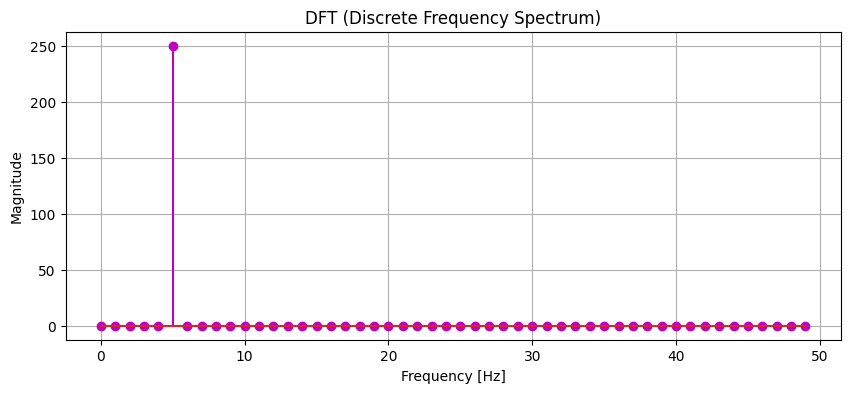

In [ ]:
# (d) Compute the Discrete Fourier Transform (DFT)
N_dft = len(sampled_signal)  # Length of sampled signal
freq_dft = fftfreq(N_dft, 1/s_rate)  # Frequency vector for sampled signal
signal_dft = fft(sampled_signal)  # Compute DFT

# Plot the DFT (only showing the positive frequencies)
plt.figure(figsize=(10, 4))
plt.stem(freq_dft[:N_dft//2], np.abs(signal_dft[:N_dft//2]), 'm', use_line_collection=True)
plt.title('DFT (Discrete Frequency Spectrum)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid()
plt.show()


Analysis of the Relationship (Shortened):
Frequency Representation:

Both plots show a strong peak, indicating a dominant frequency component, likely from a sinusoidal signal.
DTFT vs. DFT:

The DTFT shows a continuous spectrum, while the DFT shows a discrete set of points, representing sampled frequencies due to the finite nature of the signal.
Signal Characteristics:

The sharp peak with minimal side lobes suggests a periodic or simple signal, without significant harmonics or complex structure.
Resolution:

The DFT's discrete points reflect lower frequency resolution compared to the continuous DTFT, due to the limited number of time-domain samples.

Question 2

(a) Generate a composite signal by adding two or more sinusoidal signals of
different frequencies and amplitudes.

(b) Plot the time-domain waveform of the composite signal.

(c) Compute the Discrete-Time Fourier Transform (DTFT) and plot the con-
tinuous frequency spectrum.

(d) Compute the Discrete Fourier Transform (DFT) and plot the discrete
frequency spectrum.

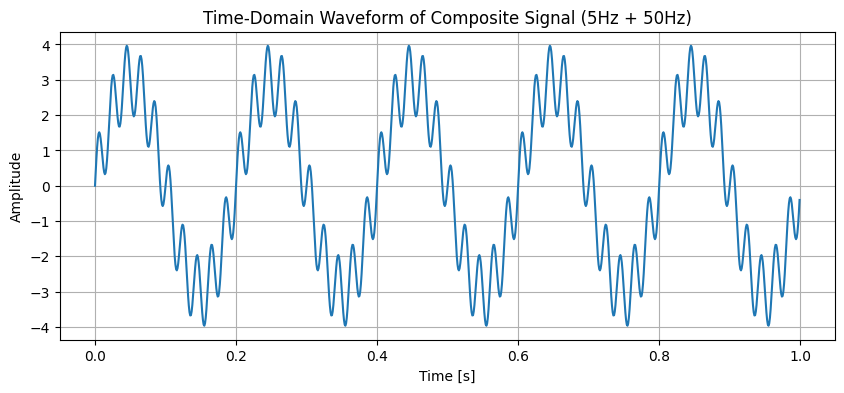

In [ ]:
# Parameters
Fs = 1000  # Sampling frequency (samples per second)
t = np.arange(0, 1, 1/Fs)  # Time vector from 0 to 1 second, sampled at 1000 Hz

# (a) Generate a composite signal
# Generate two sinusoidal signals with different frequencies and amplitudes
f1 = 5  # Frequency of first sine wave (5 Hz)
f2 = 50  # Frequency of second sine wave (50 Hz)
amp1 = 3  # Amplitude of first sine wave
amp2 = 1  # Amplitude of second sine wave

# Composite signal
signal = amp1 * np.sin(2 * np.pi * f1 * t) + amp2 * np.sin(2 * np.pi * f2 * t)


# (b) Plot the time-domain waveform of the composite signal
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title('Time-Domain Waveform of Composite Signal (5Hz + 50Hz)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

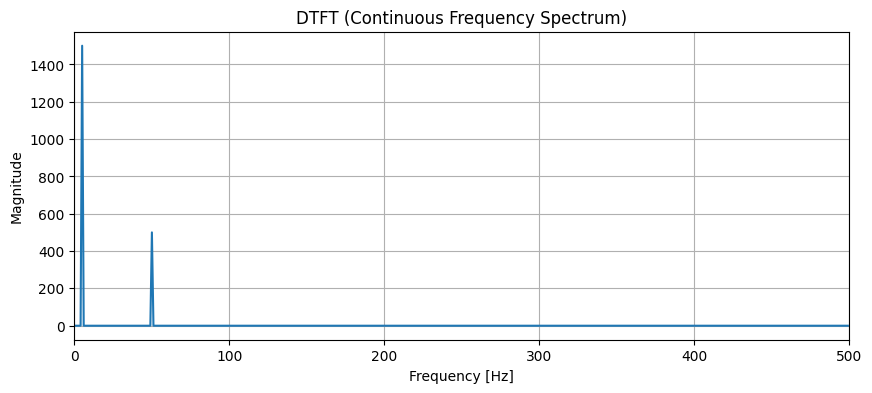

In [ ]:
# (c) Compute the Discrete-Time Fourier Transform (DTFT)
N = len(signal)  # Length of the composite signal
freq = fftfreq(N, 1/Fs)  # Frequency vector
signal_dtft = fft(signal)  # Compute DTFT (using FFT for continuous spectrum)

# Plot the DTFT (magnitude)
plt.figure(figsize=(10, 4))
plt.plot(freq[:N//2], np.abs(signal_dtft[:N//2]))  # Only plot positive frequencies
plt.title('DTFT (Continuous Frequency Spectrum)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(0, Fs/2)  # Limit frequency axis to Nyquist frequency
plt.grid()
plt.show()

<ipython-input-13-de18fe8a36a2>:8: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(freq_dft[:N_dft//2], np.abs(signal_dft[:N_dft//2]), 'm', use_line_collection=True)


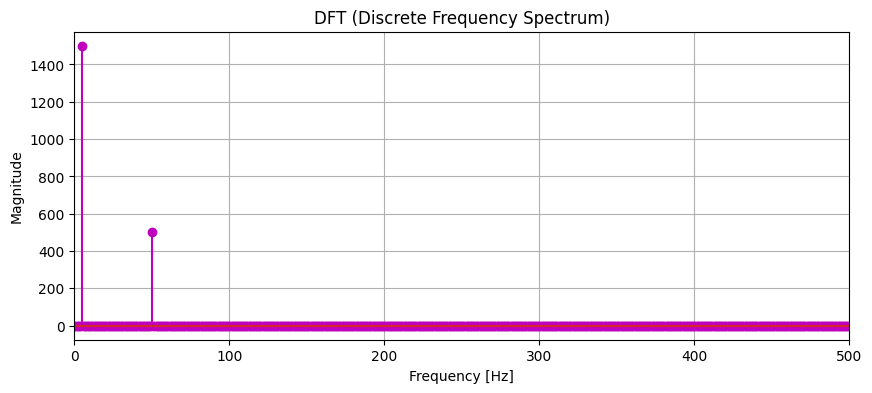

In [ ]:
# (d) Compute the Discrete Fourier Transform (DFT)
N_dft = N  # Length of composite signal for DFT
freq_dft = fftfreq(N_dft, 1/Fs)  # Frequency vector for composite signal
signal_dft = fft(signal)  # Compute DFT

# Plot the DFT (only showing the positive frequencies)
plt.figure(figsize=(10, 4))
plt.stem(freq_dft[:N_dft//2], np.abs(signal_dft[:N_dft//2]), 'm', use_line_collection=True)
plt.title('DFT (Discrete Frequency Spectrum)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(0, Fs/2)  # Limit frequency axis to Nyquist frequency
plt.grid()
plt.show()

Analysis of the Relationship (Shortened):
Frequency Representation:

Both plots show two clear peaks, indicating the presence of two distinct frequency components in the signal.
DTFT vs. DFT:

The DTFT provides a continuous frequency spectrum, while the DFT shows discrete frequency points, representing the sampled version of the signal.
Signal Characteristics:

The sharp peaks at different frequencies indicate that the signal consists of multiple sinusoidal components or a composite signal with distinct frequency components.

inference:

The DFT's discrete points reflect lower frequency resolution due to a finite number of samples, approximating the continuous DTFT spectrum.

(3) Question 3


(a) Generate an exponentially decaying signal.

(b) Plot the time-domain waveform.

(c) Compute the Discrete-Time Fourier Transform (DTFT) and plot the con-
tinuous frequency spectrum.

(d) Compute the Discrete Fourier Transform (DFT) and plot the discrete
frequency spectrum.

(e) Analyze the relationship between the time-domain waveform and the
frequency-domain representation.

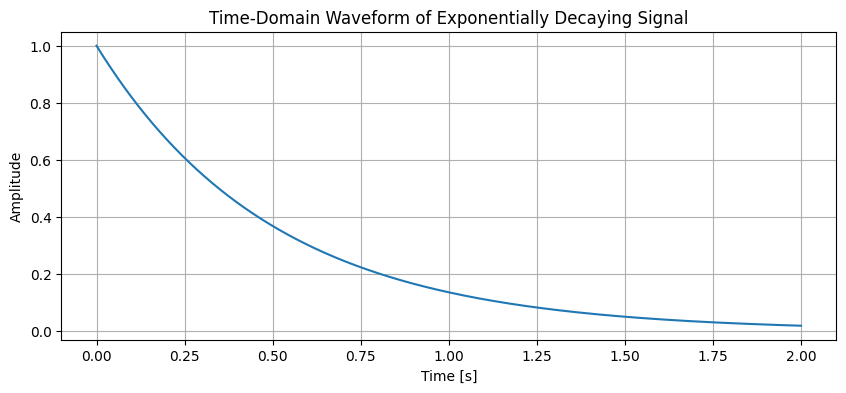

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

# Parameters
Fs = 1000  # Sampling frequency (samples per second)
t = np.arange(0, 2, 1/Fs)  # Time vector from 0 to 2 seconds, sampled at 1000 Hz

# (a) Generate an exponentially decaying signal
# Exponential decay parameters
decay_rate = 2  # Decay rate
signal = np.exp(-decay_rate * t)  # Exponentially decaying signal

# (b) Plot the time-domain waveform
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title('Time-Domain Waveform of Exponentially Decaying Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

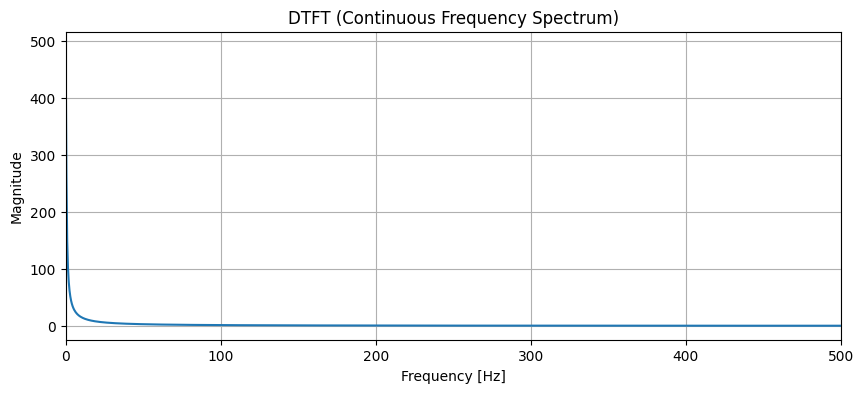

In [ ]:
# (c) Compute the Discrete-Time Fourier Transform (DTFT)
N = len(signal)  # Length of the signal
freq = fftfreq(N, 1/Fs)  # Frequency vector
signal_dtft = fft(signal)  # Compute DTFT (using FFT for continuous spectrum)

# Plot the DTFT (magnitude)
plt.figure(figsize=(10, 4))
plt.plot(freq[:N//2], np.abs(signal_dtft[:N//2]))  # Only plot positive frequencies
plt.title('DTFT (Continuous Frequency Spectrum)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(0, Fs/2)  # Limit frequency axis to Nyquist frequency
plt.grid()
plt.show()

<ipython-input-16-6b8a0cda40e1>:8: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(freq_dft[:N_dft//2], np.abs(signal_dft[:N_dft//2]), 'm', use_line_collection=True)


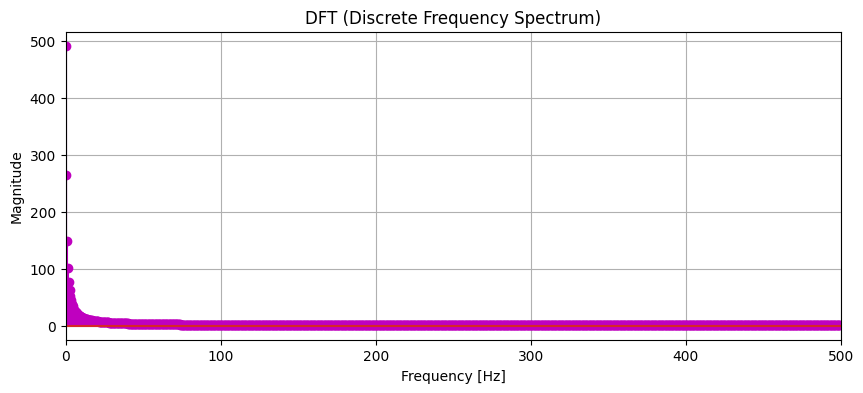

Analysis of the Relationship:
1. The time-domain waveform is an exponentially decaying signal which indicates that the amplitude decreases over time.
2. In the frequency domain, the DTFT and DFT show a spread of energy primarily concentrated at low frequencies.
3. The decay rate in the time domain corresponds to the rapid falloff of amplitude in the frequency domain, indicating low-frequency dominance.


In [ ]:
# (d) Compute the Discrete Fourier Transform (DFT)
N_dft = N  # Length of the signal for DFT
freq_dft = fftfreq(N_dft, 1/Fs)  # Frequency vector for signal
signal_dft = fft(signal)  # Compute DFT

# Plot the DFT (only showing the positive frequencies)
plt.figure(figsize=(10, 4))
plt.stem(freq_dft[:N_dft//2], np.abs(signal_dft[:N_dft//2]), 'm', use_line_collection=True)
plt.title('DFT (Discrete Frequency Spectrum)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(0, Fs/2)  # Limit frequency axis to Nyquist frequency
plt.grid()
plt.show()

# (e) Analyze the relationship between the time-domain waveform and the frequency-domain representation
# Displaying a simple analysis
print("Analysis of the Relationship:")
print("1. The time-domain waveform is an exponentially decaying signal which indicates that the amplitude decreases over time.")
print("2. In the frequency domain, the DTFT and DFT show a spread of energy primarily concentrated at low frequencies.")
print("3. The decay rate in the time domain corresponds to the rapid falloff of amplitude in the frequency domain, indicating low-frequency dominance.")


(4) Question 4

(a) Generate an rectangular signal.

(b) Plot the time-domain waveform.

(c) Compute the Discrete-Time Fourier Transform (DTFT) and plot the con-
tinuous frequency spectrum.

(d) Compute the Discrete Fourier Transform (DFT) and plot the discrete
frequency spectrum.

(e) Analyze the relationship between the time-domain waveform and the
frequency-domain representation.

Write an inference on the frequency domain analysis of various signals using

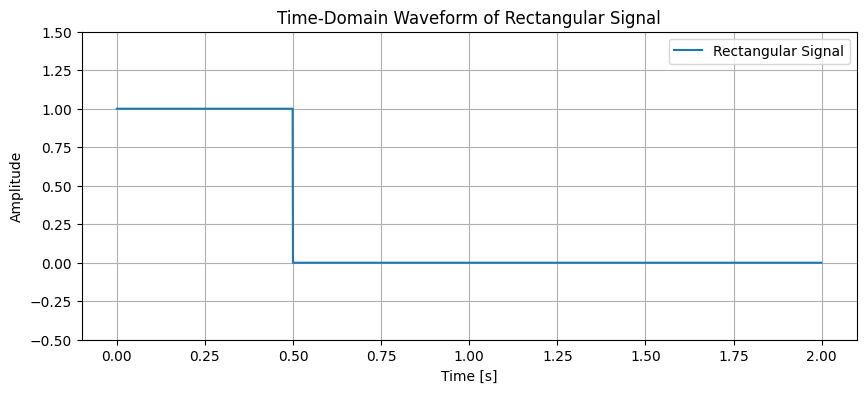

In [ ]:
# Parameters
Fs = 1000  # Sampling frequency (samples per second)
t = np.arange(0, 2, 1/Fs)  # Time vector from 0 to 2 seconds, sampled at 1000 Hz

# (a) Generate a rectangular signal
# Parameters for the rectangular signal
duration = 1  # Duration of the pulse in seconds
width = 0.5   # Width of the pulse in seconds

# Create the rectangular signal
signal = np.where((t >= 0) & (t < width), 1, 0)  # Rectangular pulse

# (b) Plot the time-domain waveform
plt.figure(figsize=(10, 4))
plt.plot(t, signal, label='Rectangular Signal')
plt.title('Time-Domain Waveform of Rectangular Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.ylim(-0.5, 1.5)  # Set y limits for better visibility
plt.legend()
plt.show()

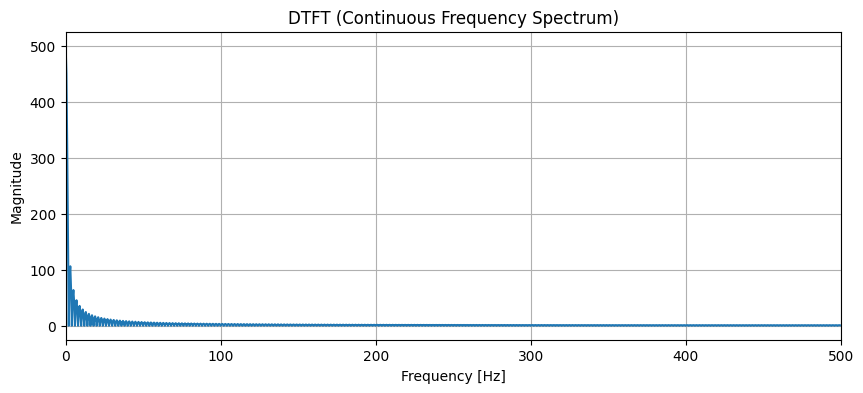

In [ ]:
# (c) Compute the Discrete-Time Fourier Transform (DTFT)
N = len(signal)  # Length of the signal
freq = fftfreq(N, 1/Fs)  # Frequency vector
signal_dtft = fft(signal)  # Compute DTFT (using FFT for continuous spectrum)

# Plot the DTFT (magnitude)
plt.figure(figsize=(10, 4))
plt.plot(freq[:N//2], np.abs(signal_dtft[:N//2]))  # Only plot positive frequencies
plt.title('DTFT (Continuous Frequency Spectrum)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(0, Fs/2)  # Limit frequency axis to Nyquist frequency
plt.grid()
plt.show()

<ipython-input-19-2cb65210e39a>:8: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(freq_dft[:N_dft//2], np.abs(signal_dft[:N_dft//2]), 'm', use_line_collection=True)


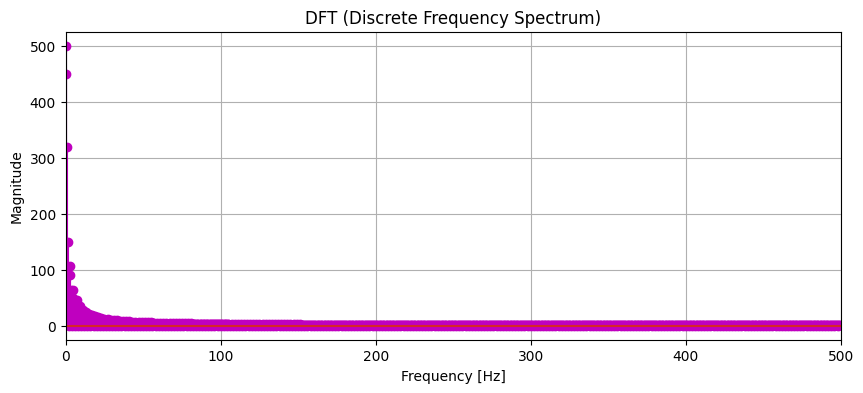

Analysis of the Relationship:
1. The time-domain waveform is a rectangular pulse that is on for half the duration and off for the other half.
2. The frequency-domain representation shows a sinc function (which is a characteristic of rectangular signals).
3. The wider the rectangular pulse, the narrower the main lobe in the frequency spectrum, indicating a lower bandwidth.
4. The oscillations in the frequency domain (side lobes) diminish as the pulse width increases, showcasing the trade-off between time and frequency localization.


In [ ]:
# (d) Compute the Discrete Fourier Transform (DFT)
N_dft = N  # Length of the signal for DFT
freq_dft = fftfreq(N_dft, 1/Fs)  # Frequency vector for signal
signal_dft = fft(signal)  # Compute DFT

# Plot the DFT (only showing the positive frequencies)
plt.figure(figsize=(10, 4))
plt.stem(freq_dft[:N_dft//2], np.abs(signal_dft[:N_dft//2]), 'm', use_line_collection=True)
plt.title('DFT (Discrete Frequency Spectrum)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(0, Fs/2)  # Limit frequency axis to Nyquist frequency
plt.grid()
plt.show()

# (e) Analyze the relationship between the time-domain waveform and the frequency-domain representation
# Displaying a simple analysis
print("Analysis of the Relationship:")
print("1. The time-domain waveform is a rectangular pulse that is on for half the duration and off for the other half.")
print("2. The frequency-domain representation shows a sinc function (which is a characteristic of rectangular signals).")
print("3. The wider the rectangular pulse, the narrower the main lobe in the frequency spectrum, indicating a lower bandwidth.")
print("4. The oscillations in the frequency domain (side lobes) diminish as the pulse width increases, showcasing the trade-off between time and frequency localization.")
